In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")
df

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [4]:
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [5]:
#checking for duplicates in order ID
df["Order ID"].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Name: Order ID, Length: 9994, dtype: bool

In [6]:
#changing order date from object datatype to datetime
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Order Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9994 entries, 0 to 9993
Series name: Order Date
Non-Null Count  Dtype         
--------------  -----         
9994 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.2 KB


In [7]:
#adding the order year columns
df["Order year"] = df["Order Date"].dt.year
#adding the order month column
df["Order Month"] = df["Order Date"].dt.month_name()
#adding the Order day column
df["Order Day"] = df["Order Date"].dt.day_name()
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order year,Order Month,Order Day
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,2017,November,Wednesday
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,2017,November,Wednesday
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,2017,June,Monday
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,2016,October,Tuesday
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,2016,October,Tuesday


In [8]:
#unique values in each column
df.nunique()

Order ID         9994
Customer Name      50
Category            7
Sub Category       23
City               24
Order Date       1236
Region              5
Sales            1989
Discount           26
Profit           8380
State               1
Order year          4
Order Month        12
Order Day           7
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,9994.0,1496.596158,577.559036,500.00,1000.0000,1498.00,1994.7500,2500.00
Discount,9994.0,0.226817,0.074636,0.10,0.1600,0.23,0.2900,0.35
Profit,9994.0,374.937082,239.932881,25.25,180.0225,320.78,525.6275,1120.95
Order year,9994.0,2016.722233,1.123555,2015.00,2016.0000,2017.00,2018.0000,2018.00


Between the year 2016-2018,the highest sales per order was 2500,the least was 500. The highest discount was 0.35 while the least was 0.22. The highest profit per sale was 1120 while the least was 374

In [10]:
df.describe(exclude="number",datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max
Order ID,9994,9994,OD1,1,NaT,NaT,NaT,NaT,NaT,NaT
Customer Name,9994,50,Amrish,227,NaT,NaT,NaT,NaT,NaT,NaT
Category,9994,7,Snacks,1514,NaT,NaT,NaT,NaT,NaT,NaT
Sub Category,9994,23,Health Drinks,719,NaT,NaT,NaT,NaT,NaT,NaT
City,9994,24,Kanyakumari,459,NaT,NaT,NaT,NaT,NaT,NaT
Order Date,9994,NaN,NaN,NaN,2017-04-30 05:17:08.056834048,2015-01-03,2016-05-23,2017-06-26,2018-05-14,2018-12-30
Region,9994,5,West,3203,NaT,NaT,NaT,NaT,NaT,NaT
State,9994,1,Tamil Nadu,9994,NaT,NaT,NaT,NaT,NaT,NaT
Order Month,9994,12,November,1471,NaT,NaT,NaT,NaT,NaT,NaT
Order Day,9994,7,Tuesday,1933,NaT,NaT,NaT,NaT,NaT,NaT


# Exploratory Data Analysis and Visualization

## Customer Name

In [11]:
customer = df["Customer Name"].value_counts()
customer = customer.head(5)
customer

Amrish      227
Krithika    224
Verma       218
Arutra      218
Vidya       215
Name: Customer Name, dtype: int64

From 2016 - 2018,the customer with most order purchases was Amrish with 227 orders,followed by Krithika then Verma

### detailed analysis of Top profitable customer overally,and most profitable customers per year

In [12]:
profitable_customer = df.groupby(["Customer Name","Profit","State","Region","City"])["Profit"].count().reset_index(name="count")
profitable_customer = profitable_customer.sort_values("Profit",ascending=False)
profitable_customer = profitable_customer.head(10)
profitable_customer

,Customer Name,Profit,State,Region,City,count
2781,Haseena,1120.95,Tamil Nadu,Central,Cumbum,1
8603,Verma,1120.50,Tamil Nadu,Central,Theni,1
9792,Yadav,1111.05,Tamil Nadu,Central,Theni,1
391,Aditi,1103.40,Tamil Nadu,East,Coimbatore,1
3772,Komal,1102.50,Tamil Nadu,Central,Karur,1
9412,Vinne,1097.55,Tamil Nadu,West,Madurai,1
9607,Willams,1095.30,Tamil Nadu,Central,Ramanadhapuram,1
587,Akash,1094.40,Tamil Nadu,East,Salem,1
2004,Esther,1093.05,Tamil Nadu,West,Trichy,1
6364,Sabeela,1090.32,Tamil Nadu,Central,Krishnagiri,1


Text(0.5, 1.0, 'Top Ten Overall Profitable customers')

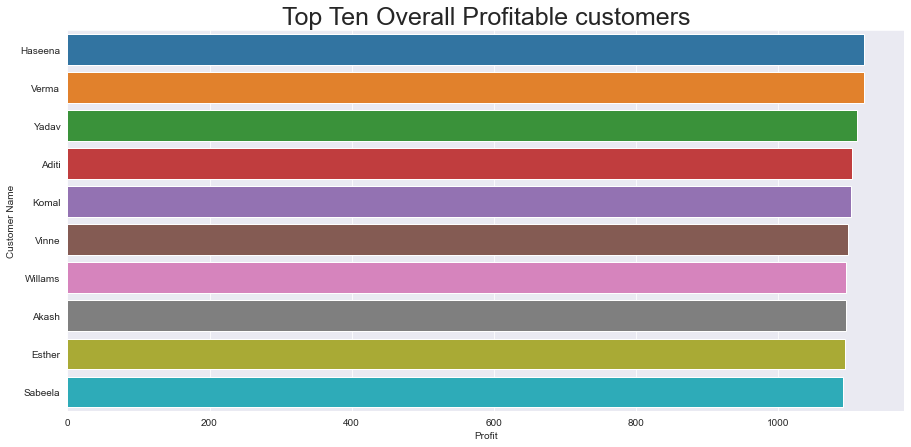

In [13]:
plt.figure(figsize=(15,7))
sns.barplot(x="Profit",y="Customer Name",data=profitable_customer)
plt.title("Top Ten Overall Profitable customers",fontsize=25)

Overally, Haseena was the most profitable customer from Central Tamil Nadu Cumbum	City,followed by Verma and Yadav of Theni	 City. Uncertainly, All top ten profitable customers come from the same state of Tamil Nadu although different Regions.

In [14]:
profit_customer_year = df.groupby(["Customer Name","Profit","State","Region","Order year"])["Profit"].count().reset_index(name="count")
profit_customer_year = profit_customer_year.sort_values("Profit",ascending=False)
profit_customer_year  = profit_customer_year .head(10)
profit_customer_year 

,Customer Name,Profit,State,Region,Order year,count
2781,Haseena,1120.95,Tamil Nadu,Central,2017,1
8603,Verma,1120.50,Tamil Nadu,Central,2015,1
9792,Yadav,1111.05,Tamil Nadu,Central,2015,1
391,Aditi,1103.40,Tamil Nadu,East,2016,1
3772,Komal,1102.50,Tamil Nadu,Central,2017,1
9412,Vinne,1097.55,Tamil Nadu,West,2017,1
9607,Willams,1095.30,Tamil Nadu,Central,2018,1
587,Akash,1094.40,Tamil Nadu,East,2017,1
2004,Esther,1093.05,Tamil Nadu,West,2018,1
6364,Sabeela,1090.32,Tamil Nadu,Central,2017,1


Text(0.5, 1.0, 'Profitable Customer per Year')

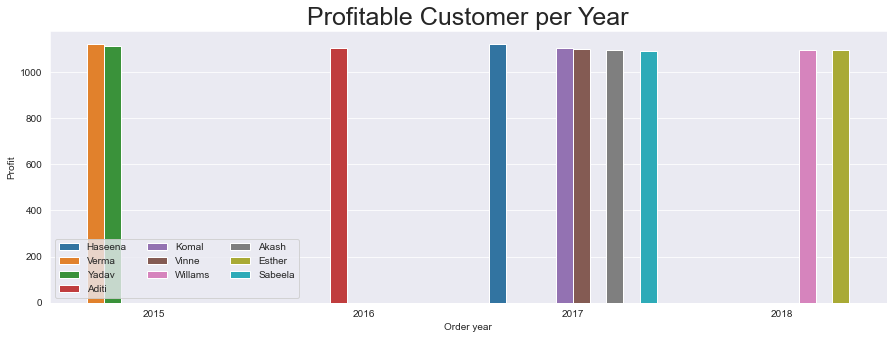

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(y="Profit",x="Order year",hue="Customer Name",data=profit_customer_year )
plt.legend(ncol=3,loc="lower left")
plt.title("Profitable Customer per Year",fontsize=25)

In 2015,Verma of Tamil Nadu Central was the most profitable customer at 1111.05.In 2016, Aditi of Tamil Nadu East was the most profitable customer.In 2017,Haseena of Tamil Nadu Central was the most profitable customer. In 2018,Willams of Tamil Nadu Centralwas the most profitbale customer.
Tamil Nadu Central produced the most profitable customers overally

## CATEGORY

detailed analysis of Most ordered categories,

In [16]:
Most_ordered_category = df["Category"].value_counts()
Most_ordered_category

Snacks               1514
Eggs, Meat & Fish    1490
Fruits & Veggies     1418
Bakery               1413
Beverages            1400
Food Grains          1398
Oil & Masala         1361
Name: Category, dtype: int64

Text(0.5, 1.0, 'Most ordered Categories')

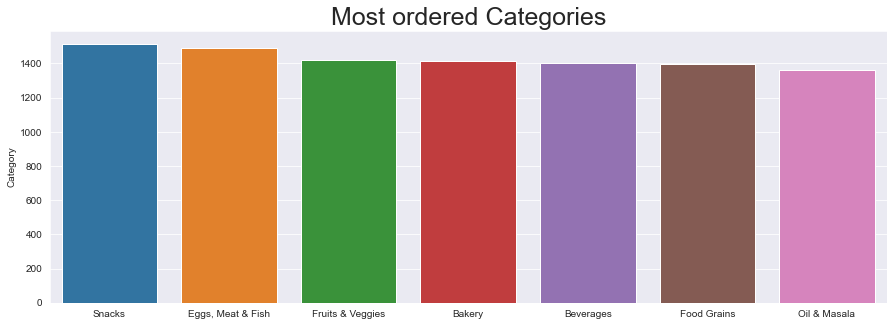

In [17]:
plt.figure(figsize=(15,5))
sns.barplot(y=Most_ordered_category,x=Most_ordered_category.index)
plt.title("Most ordered Categories",fontsize=25)

In [18]:
Profitable_category = df.groupby(["Category","Profit","Order year"])["Category"].count().reset_index(name="count")
Profitable_category = Profitable_category.sort_values("Profit",ascending=False)
Profitable_category = Profitable_category.head(10)
Profitable_category

,Category,Profit,Order year,count
1402,Bakery,1120.95,2017,1
7068,Fruits & Veggies,1120.50,2015,1
1401,Bakery,1111.05,2015,1
1400,Bakery,1103.40,2016,1
9928,Snacks,1102.50,2017,1
4270,"Eggs, Meat & Fish",1097.55,2017,1
2789,Beverages,1095.30,2018,1
7067,Fruits & Veggies,1094.40,2017,1
1399,Bakery,1093.05,2018,1
8424,Oil & Masala,1090.32,2017,1


Text(0.5, 1.0, 'Profitable Categories')

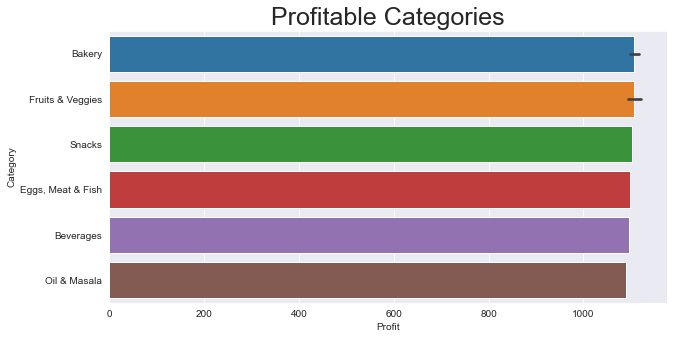

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x="Profit",y="Category",data=Profitable_category)
plt.title("Profitable Categories",fontsize=25)

Bakery was the most profitable Category although Snacks were the most ordered Categories.

Text(0.5, 1.0, 'Profitable Category per Year')

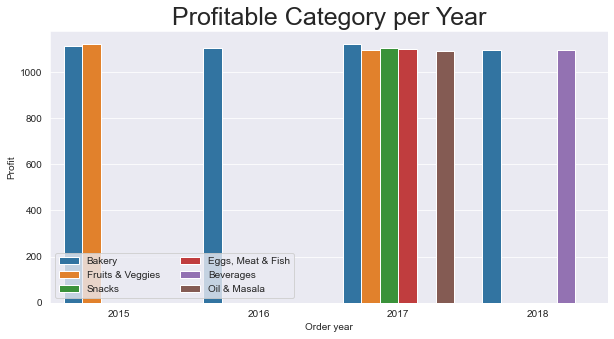

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x="Order year",y="Profit",hue="Category",data=Profitable_category)
plt.legend(ncol=2,loc="lower left")
plt.title("Profitable Category per Year",fontsize=25)

In 2015,Fruits and vegetables were the most Profitable categories. In 2016,Bakery was the most profitable.In 2017,Bakery remained tobe the most profitable. In 2018,Beverages wwas the most profitable category

## Sub Categories

In [21]:
Profitable_SubCat = df.groupby(["Sub Category","Category","Profit","City"])["Profit"].count().reset_index(name="count")
Profitable_SubCat = Profitable_SubCat.sort_values("Profit",ascending=False)
Profitable_SubCat = Profitable_SubCat.head(10)
Profitable_SubCat

,Sub Category,Category,Profit,City,count
1764,Cakes,Bakery,1120.95,Cumbum,1
5041,Fresh Fruits,Fruits & Veggies,1120.50,Theni,1
1312,Breads & Buns,Bakery,1111.05,Theni,1
810,Biscuits,Bakery,1103.40,Coimbatore,1
3130,Cookies,Snacks,1102.50,Karur,1
2111,Chicken,"Eggs, Meat & Fish",1097.55,Madurai,1
9544,Soft Drinks,Beverages,1095.30,Ramanadhapuram,1
8533,Organic Vegetables,Fruits & Veggies,1094.40,Salem,1
809,Biscuits,Bakery,1093.05,Trichy,1
6577,Masalas,Oil & Masala,1090.32,Krishnagiri,1


Text(0.5, 1.0, 'Top Ten Profitable Sub Categories per Category')

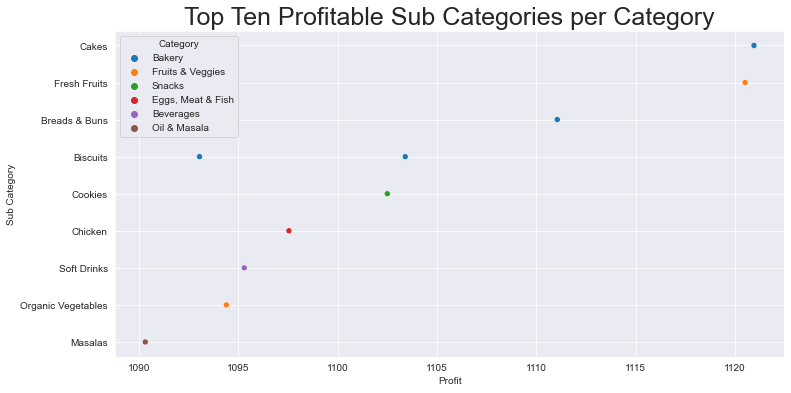

In [22]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Profit",y="Sub Category",hue="Category",data=Profitable_SubCat)
plt.title("Top Ten Profitable Sub Categories per Category",fontsize=25)

Sub Category Cake of Category Bakery,was the most profitable Subcategory, followed by Sub category Fresh Fruits of Category Fruits and Vegetables. Sub Category Masala was the least profitable

## CITY

In [23]:
df["City"].value_counts()

Kanyakumari       459
Tirunelveli       446
Bodi              442
Krishnagiri       440
Vellore           435
Perambalur        434
Tenkasi           432
Chennai           432
Salem             431
Karur             430
Pudukottai        430
Coimbatore        428
Ramanadhapuram    421
Cumbum            417
Virudhunagar      416
Madurai           408
Ooty              404
Namakkal          403
Viluppuram        397
Dindigul          396
Theni             387
Dharmapuri        376
Nagercoil         373
Trichy            357
Name: City, dtype: int64

In [24]:
profitable_city = df.groupby(["Profit","Customer Name","City","Region","Category","Sub Category"])["City"].count().reset_index(name="count")
profitable_city = profitable_city.sort_values("Profit",ascending=False)
profitable_city

,Profit,Customer Name,City,Region,Category,Sub Category,count
9993,1120.95,Haseena,Cumbum,Central,Bakery,Cakes,1
9992,1120.50,Verma,Theni,Central,Fruits & Veggies,Fresh Fruits,1
9991,1111.05,Yadav,Theni,Central,Bakery,Breads & Buns,1
9990,1103.40,Aditi,Coimbatore,East,Bakery,Biscuits,1
9989,1102.50,Komal,Karur,Central,Snacks,Cookies,1
...,...,...,...,...,...,...,...
4,26.85,Surya,Theni,South,Oil & Masala,Masalas,1
3,25.85,Amrish,Coimbatore,South,"Eggs, Meat & Fish",Fish,1
2,25.55,Veronica,Dharmapuri,West,"Eggs, Meat & Fish",Eggs,1
1,25.45,Shree,Bodi,West,Bakery,Cakes,1


Text(0.5, 1.0, 'Profitable Cities')

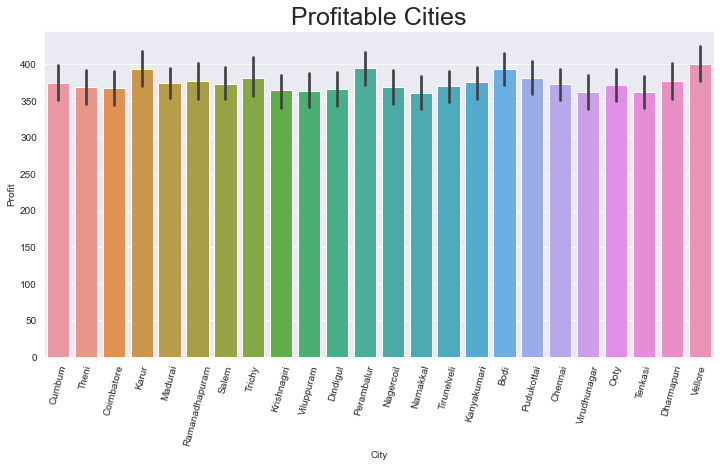

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(x="City",y="Profit",data=profitable_city)
plt.xticks(rotation=75)
plt.title("Profitable Cities",fontsize=25)

Vellore was the most profitable city,followed by Karur and Perambalur

Text(0.5, 1.0, 'Profitable Categories per City')

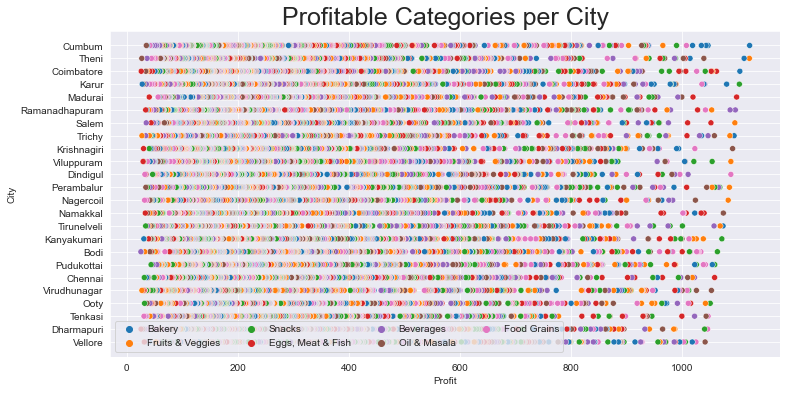

In [26]:
plt.figure(figsize=(12,6))
Profitable_customer_city = profitable_city
sns.scatterplot(x="Profit",y="City",hue="Category",data=Profitable_customer_city)
plt.legend(ncol=4,loc="lower left")
plt.title("Profitable Categories per City",fontsize=25)

Bakery Category was most profitable in Cumbum,Coimbatore,Trichy and Pudokotai. Fruits and Vegetables were most profitable in Theni,Salem,Viluppuram,Perambular. Snacks were most profitable in Karur,Bodi and Ooty

## DATE

In [27]:
profit_year = df.groupby(["Profit","Order year","Order Month","Order Day","City"])["Profit"].count().reset_index(name="count")
profit_year = profit_year.sort_values("Profit",ascending=False)
profit_year


,Profit,Order year,Order Month,Order Day,City,count
9992,1120.95,2017,September,Monday,Cumbum,1
9991,1120.50,2015,February,Monday,Theni,1
9990,1111.05,2015,December,Wednesday,Theni,1
9989,1103.40,2016,September,Sunday,Coimbatore,1
9988,1102.50,2017,March,Wednesday,Karur,1
...,...,...,...,...,...,...
4,26.85,2016,May,Sunday,Theni,1
3,25.85,2018,January,Sunday,Coimbatore,1
2,25.55,2017,June,Wednesday,Dharmapuri,1
1,25.45,2015,August,Sunday,Bodi,1


Text(0.5, 1.0, 'Profitable year')

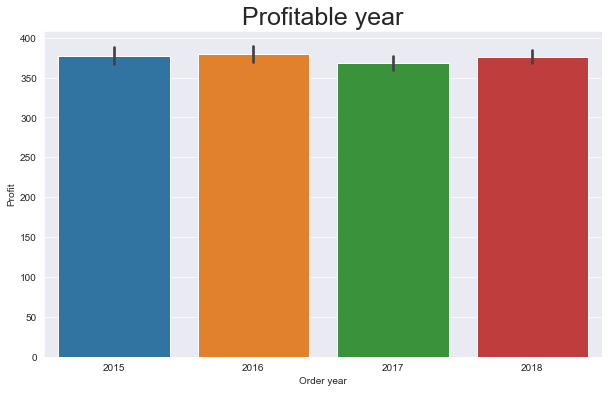

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x="Order year",y="Profit",data=profit_year)
plt.title("Profitable year",fontsize=25)

2015 was the most profitable year

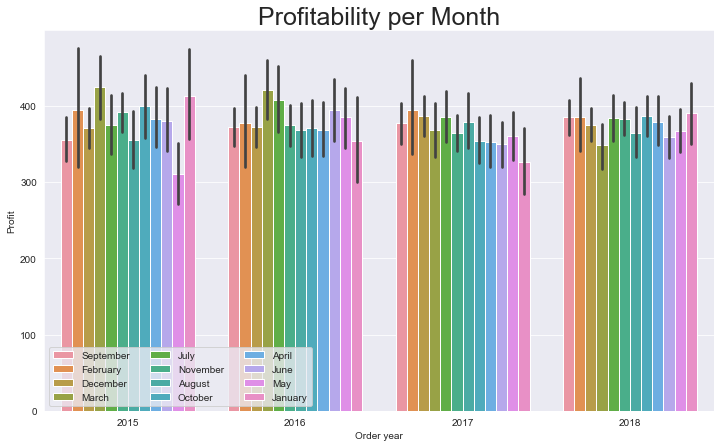

In [29]:
plt.figure(figsize=(12,7))
sns.barplot(x="Order year",y="Profit",hue="Order Month",data=profit_year)
plt.title("Profitability per Month",fontsize=25)
plt.legend(ncol=3,loc="lower left")

in 2015,February was the most profitable year. In 2016, March was the most profitable month.In 2017,February was the most profitable month and in 2018,February was still the most profitable year

Text(0.5, 1.0, 'Profitable Day per Year')

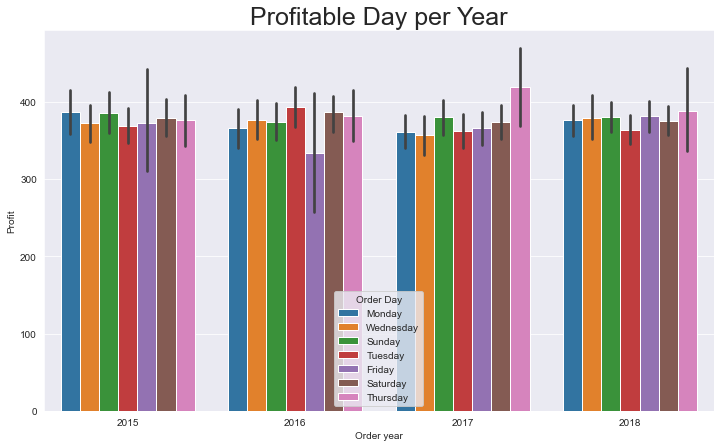

In [30]:
plt.figure(figsize=(12,7))
sns.barplot(x="Order year",y="Profit",hue="Order Day",data=profit_year)
plt.title("Profitable Day per Year",fontsize=25)

In 2015, Friday was the most profitable day. In 2016, Tuesday was the most profitable day.In 2017, Thursday was the most profitable day. In 2018,thursday wwas also the most profitable day

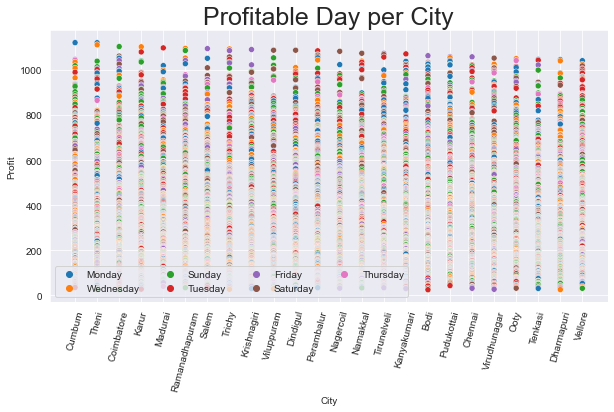

In [31]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="City",y="Profit",hue="Order Day",data=profit_year)
plt.xticks(rotation=75)
plt.title("Profitable Day per City",fontsize=25)
plt.legend(ncol=4,loc="lower left")

Monday was the most profitable day in Cumbum,Theni and vellore. Tuesday was profitable day for Madurai,Kanyakumari.Wednesday was most profitable day in Karurand Ramanadharam.Thursday was not the most profitable day in any city.Friday was most profitable day in Salem,Krishnagri,Bodi and Chennai. Saturdy was the most profitable day for Viluppuram,Dindigul,Nagercoil and Namakkai.Sunday was most profitable day in Coimbatore

Text(0.5, 1.0, 'Discount per category')

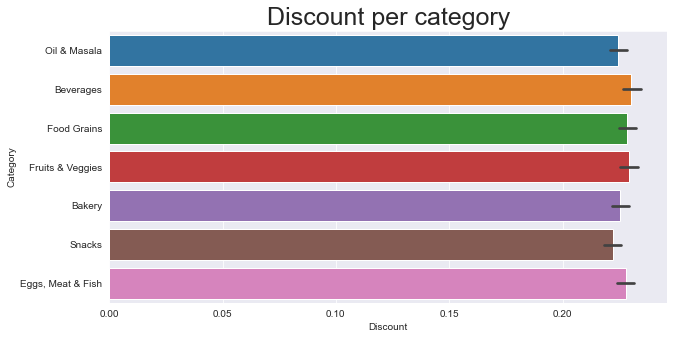

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(x="Discount",y="Category",data=df)
plt.title("Discount per category",fontsize=25)

Beverages had the most discount while Snacks had the least Discount